In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set()
import warnings; warnings.filterwarnings('ignore')

# Image Noise Filter

## Load Data

In [6]:
from sklearn.datasets import fetch_openml


mnist = fetch_openml('mnist_784', version=1)
X, y = mnist['data'], mnist['target']
y = y.astype(np.uint8)
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


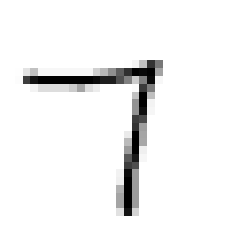

In [4]:
def plot_digit(digit, figsize=(4, 4), cmap=plt.cm.Greys, interpolation='nearest'):
    if digit.shape != (28, 28):
        digit = digit.reshape(28, 28)
    plt.figure(figsize=figsize)
    plt.imshow(digit, cmap=cmap, interpolation=interpolation)
    plt.grid(False)
    plt.axis('off')
    plt.show()


rnd_idx = np.random.randint(X.shape[0])
rnd_digit = X[rnd_idx]
plot_digit(rnd_digit)

In [5]:
print(y[rnd_idx])

7


## Add Noise to Original Dataset

In [7]:
noise = np.random.randint(0, 100, X.shape)
X_noisy = X + noise
y_noisy = X

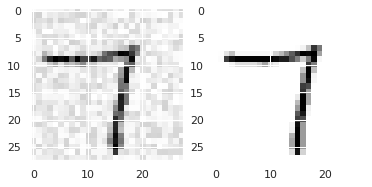

In [39]:
def plot_noisy_clean(noisy, clean, figsize=(4, 4), cmap=plt.cm.Greys,
                     interpolation='nearest'):
    if noisy.shape != (28, 28):
        noisy = noisy.reshape(28, 28)
    if clean.shape != (28, 28):
        clean = clean.reshape(28, 28)
    fig, axes = plt.subplots(nrows=1, ncols=2, clear=True)
    axes[0].imshow(noisy, cmap=cmap, interpolation=interpolation)
    axes[1].imshow(clean, cmap=cmap, interpolation=interpolation)
    plt.show()


plot_noisy_clean(X_noisy[rnd_idx], y_noisy[rnd_idx])

## Split Data

In [30]:
from sklearn.model_selection import train_test_split


X_noisy_train, X_noisy_test, y_noisy_train, y_noisy_test = train_test_split(X_noisy, y_noisy, test_size=10000)
assert X_noisy_train.shape == y_noisy_train.shape, "Wrong arguments order in `train_test_split` call"

## Train Multiclass Classifier

Since the task is to map noisy pixels of input image to clear pixels (i.e. we can interpret every image as an instance with its pixels as classes), this is the task of multiclass classification.

In [31]:
from sklearn.neighbors import KNeighborsClassifier


knn_filter = KNeighborsClassifier()
knn_filter.fit(X_noisy_train, y_noisy_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

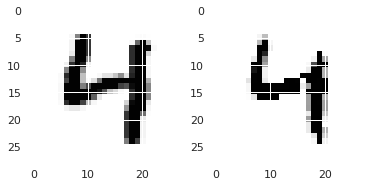

In [40]:
rnd_idx_test = np.random.randint(X_noisy_test.shape[0])
rnd_noisy_test = X_noisy_test[rnd_idx_test]
rnd_clean_test = y_noisy_test[rnd_idx_test]
rnd_filtered_test = knn_filter.predict([rnd_noisy_test])

plot_noisy_clean(rnd_clean_test, rnd_filtered_test)

But how it handles already clean digits?

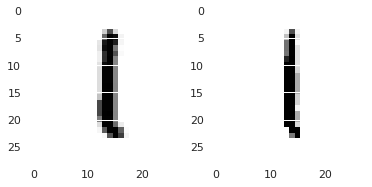

In [41]:
clean_filtered = knn_filter.predict([y_noisy_train[rnd_idx_test]])
plot_noisy_clean(y_noisy_train[rnd_idx_test], clean_filtered)

As we can see, an image that is already clean is still clean after filtering. However, some information gets lost, as some of least bright pixels are treated as noise, and thus get filtered out.

#### Save Trained Filter

In [42]:
import joblib


joblib.dump(knn_filter, "mnist_noise_filter__knn_.pkl")

['mnist_noise_filter__knn_.pkl']

# TODOs

* How could we measure filter's performance on this task?
* How could we improve model in a way that it recognizes whether or not an image need is clear or not?
* Search for the best hyperparameters.